### Statistical Related Risk: Volatility & Statistical Related Risk: Correlation

Volatility is the rate of fluctuation of the stock's price over time. Highly volatile assets are riskier than the less volatile assets. Thus volatility becomes an inevitable statistic for an investor to assess the risk involved in an investment option.

One way to mitigate the volatility related risk is to diversify the portfolio with the assets with low to no correlation as the famous saying goes "Don't put all your eggs in one basket".

Volatility are of two types:

* Historical volatility
* Implied volatility

Most common way to measure the historical volatility of an asset is by computing the Variance $(\sigma^2)$ or the standard deviation $(\sigma)$, which is the square root of variance.

#### Returns

The returns of an asset is calculated as simple returns or log returns.


$
\hspace{3cm}R_{simple} = \large{\frac{p_1 - p_0}{p_0}} \\[10 pt]
\hspace{3cm}R_{log} = \large{log\left(\frac{p_1}{p_0}\right)} \\[10 pt]
\hspace{3.5cm}\text{where,} \\
\hspace{4cm}R_{simple} = \text{simple returns}\\
\hspace{4cm}R_{log} = \text{log returns}\\
\hspace{4cm}p_0 = \text{initial value}\\
\hspace{4cm}p_1 = \text{final value}
$

#### Variance

Variance is the average of squared difference from the mean.

* The mean of all returns over the given time is computed.
* The difference of the return at each data point from the mean is determined.
* The sum of their squares is divided by the total number of data points subtracted by one to get the variance.

$
\hspace{3cm}\large{\sigma^2 = \frac{\sum_{i=1}^{n}{(x_i - \bar{x})^2}}{n-1}}\\
\hspace{3.5cm}\text{where,}\\
\hspace{4cm}x_i = \text{value of observation}\\
\hspace{4cm}\bar{x} = \text{mean of all observations}\\
\hspace{4cm}n = \text{number of observations}
$


#### Standard deviation

The standard deviation is the amount of dispersion from the mean. It is simply the square root of variance.

$
\hspace{3cm}\normalsize{\text{Standard deviation} (\sigma) = \sqrt{\text{variance}}}
$

#### Sharpe ratio

Sharpe ratio is the ratio of the return beyond the risk-free rate to the volatility (SD) of the asset.

$
\hspace{3cm}\large{s_a = \frac{R_p - R_f}{\sigma_p}}\\
\hspace{3.5cm}\text{where,}\\
\hspace{4cm}R_p = \text{Portfolio return}\\
\hspace{4cm}R_f = \text{Riskfree return}\\
\hspace{4cm}\sigma_p = \text{Standard deviation of the portfolio returns}
$

#### Covariance

Covariance measures the direction of the relationship between two variables. Covariance ranges between [$-\infty,\infty$].
A positive value indicates direct relationship and a negative value indicates inverse relationship.

$
\hspace{3cm}\large{cov_{x,y} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})\cdot(y_i - \bar{y})}{n-1}}\\
\hspace{3.5cm}\text{where,}\\
\hspace{4cm}x_i = \text{value of observation at x}\\
\hspace{4cm}\bar{x} = \text{mean of all observations of x}\\
\hspace{4cm}y_i = \text{value of observation at y}\\
\hspace{4cm}\bar{y} = \text{mean of all observations of y}\\
\hspace{4cm}n = \text{number of observations}
$

<div style="page-break-after: always;"></div>

#### Correlation

Covariance is useful in identifying the direction of the relationship, but the strength of the relationship is hard to interpret with covariance. The correlation divides the covariance by the product of the standard deviations of two variables. This transformation is particularly useful as the correlation ranges between [-1,1]. The sign indicates the direction of relationship, while the value indicates the strength of the relationship. A correlation which is close to 1 is strongly correlated, while which is close to 0 have almost no correlation.

$
\hspace{3cm}\large{\rho_{x,y} = \frac{cov_{x,y}}{\sigma_x \cdot \sigma_y}} \\[20pt]
\hspace{3.5cm}\text{where,}\\
\hspace{4cm}\text{cov}_{x,y} = \text{covariance between two variables} \\
\hspace{4cm}\sigma_x = \text{standard deviation of x} \\
\hspace{4cm}\sigma_y = \text{standard deviation of y} \\
$

<div style="page-break-after: always;"></div>

### Examples with real world data

The indices of four developed countries are taken in this example.
* Dow-Jones industrial average (US index)
* FTSE 100 (UK index)
* TSX Composite (Canada index)
* Nikkei 225 (Japan index)

In [1]:
# Importing the required libraries
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import adfuller
from statsmodels.api import qqplot
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper") 

params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

#### Downloading the data and computing log returns

yfinance package is used to collect the adjusted closing price of the above four indices for the past five years.

The log returns of each indices are then computed and are added to new columns in the dataframe.

In [2]:
tickers = ["^DJI","^FTSE", "^GSPTSE", "^N225"]
end_day = datetime(year=2022, month=7, day=30)
start_day = end_day - timedelta(days=5*365)

df = yf.download(tickers, start_day, end_day)["Adj Close"]
price_col = ["DJIA", "FTSE", "TSX", "Nikkei"]
df.columns = price_col
returns_col = [col + "_returns" for col in price_col]
df[returns_col] = np.log(df) - np.log(df.shift(1))
df.dropna(inplace=True)
print(df.info())
df

[*********************100%***********************]  4 of 4 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1015 entries, 2017-08-01 to 2022-07-29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DJIA            1015 non-null   float64
 1   FTSE            1015 non-null   float64
 2   TSX             1015 non-null   float64
 3   Nikkei          1015 non-null   float64
 4   DJIA_returns    1015 non-null   float64
 5   FTSE_returns    1015 non-null   float64
 6   TSX_returns     1015 non-null   float64
 7   Nikkei_returns  1015 non-null   float64
dtypes: float64(8)
memory usage: 71.4 KB
None


,DJIA,FTSE,TSX,Nikkei,DJIA_returns,FTSE_returns,TSX_returns,Nikkei_returns
Date,,,,,,,,
2017-08-01,21963.919922,7423.700195,15202.099609,19985.789062,0.003320,0.006989,0.003836,0.003037
2017-08-02,22016.240234,7411.399902,15265.599609,20080.039062,0.002379,-0.001658,0.004168,0.004705
2017-08-03,22026.099609,7474.799805,15192.000000,20029.259766,0.000448,0.008518,-0.004833,-0.002532
2017-08-04,22092.810547,7511.700195,15258.000000,19952.330078,0.003024,0.004924,0.004335,-0.003848
2017-08-09,22048.699219,7498.100098,15217.299805,19738.710938,-0.001660,-0.005931,-0.002566,-0.012951
...,...,...,...,...,...,...,...,...
2022-07-25,31990.039062,7306.299805,19104.500000,27699.250000,0.002841,0.004101,0.006385,-0.007747
2022-07-26,31761.539062,7306.299805,18972.699219,27655.210938,-0.007168,0.000000,-0.006923,-0.001591
2022-07-27,32197.589844,7348.200195,19254.599609,27715.750000,0.013636,0.005718,0.014749,0.002187


<div style="page-break-after: always;"></div>

#### Visualization of prices

##### Price chart

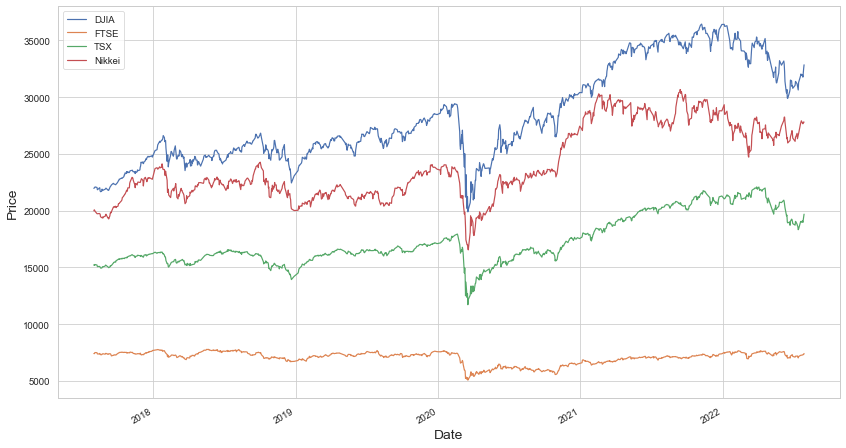

In [3]:
df[price_col].plot(figsize=(14,8), ylabel = "Price");

##### Price chart normalized to 100

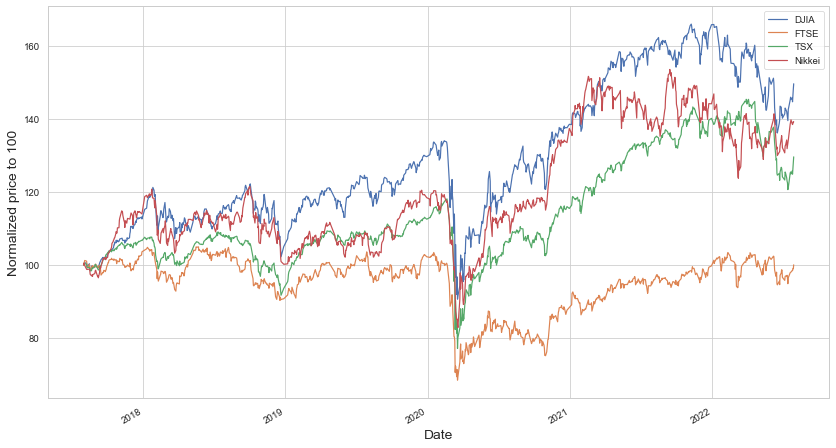

In [4]:
(df[price_col]/df[price_col].iloc[0] * 100).plot(figsize=(14,8), ylabel = "Normalized price to 100");

<div style="page-break-after: always;"></div>

#### Volatility clustering

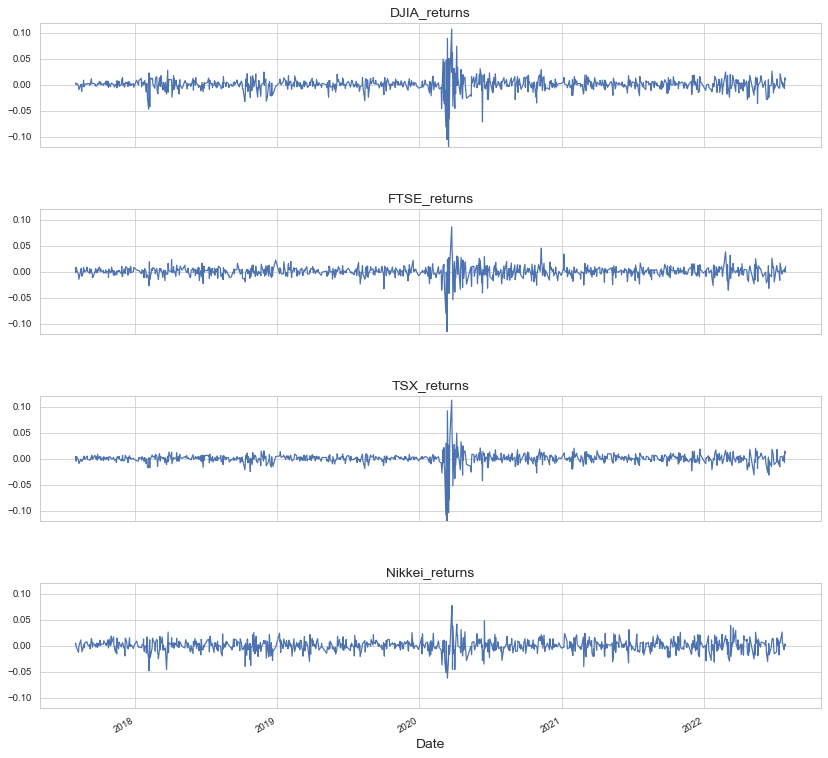

In [5]:
fig, axes = plt.subplots(4,1,figsize=(14,14))
plt.subplots_adjust(hspace=0.5)
for ticker, ax in zip(returns_col, axes.ravel()):
    df[ticker].plot(ax=ax, sharex=True, title=ticker)
    ax.set_ylim(-0.12,0.12)


plt.show()

Volatility clustering, which is a pattern of high volatile periods followed by tranquile periods can be seen in all four index returns.

<div style="page-break-after: always;"></div>

#### Distribution of the returns

##### Histogram

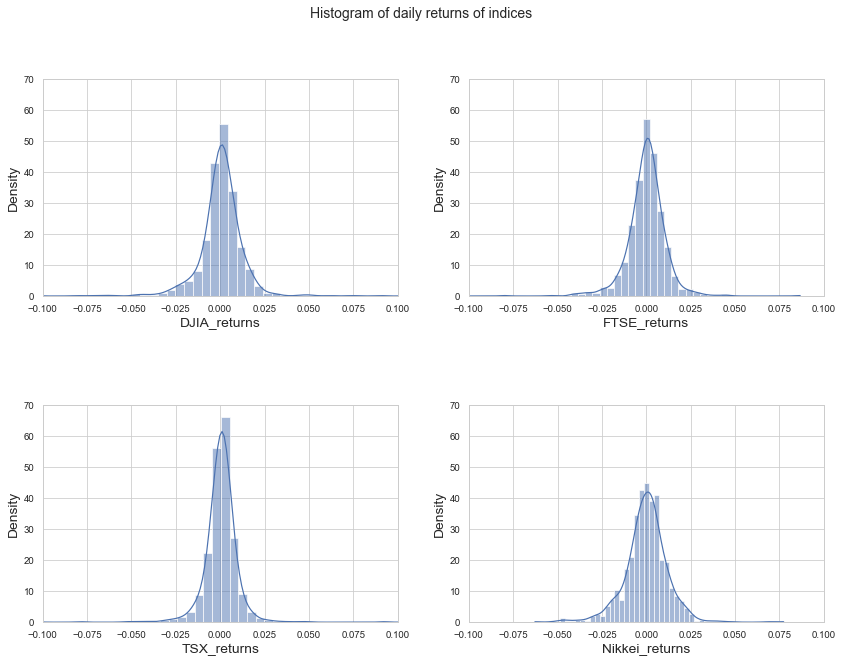

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)
for ticker, ax in zip(returns_col, axes.ravel()):
    sns.histplot(df[ticker], ax=ax, bins=50, kde=True, stat="density")
    ax.set_xlim(-0.1,0.1)
    ax.set_ylim((0,70))
fig.suptitle("Histogram of daily returns of indices", fontsize=14)
plt.show()

<div style="page-break-after: always;"></div>

##### Boxplot

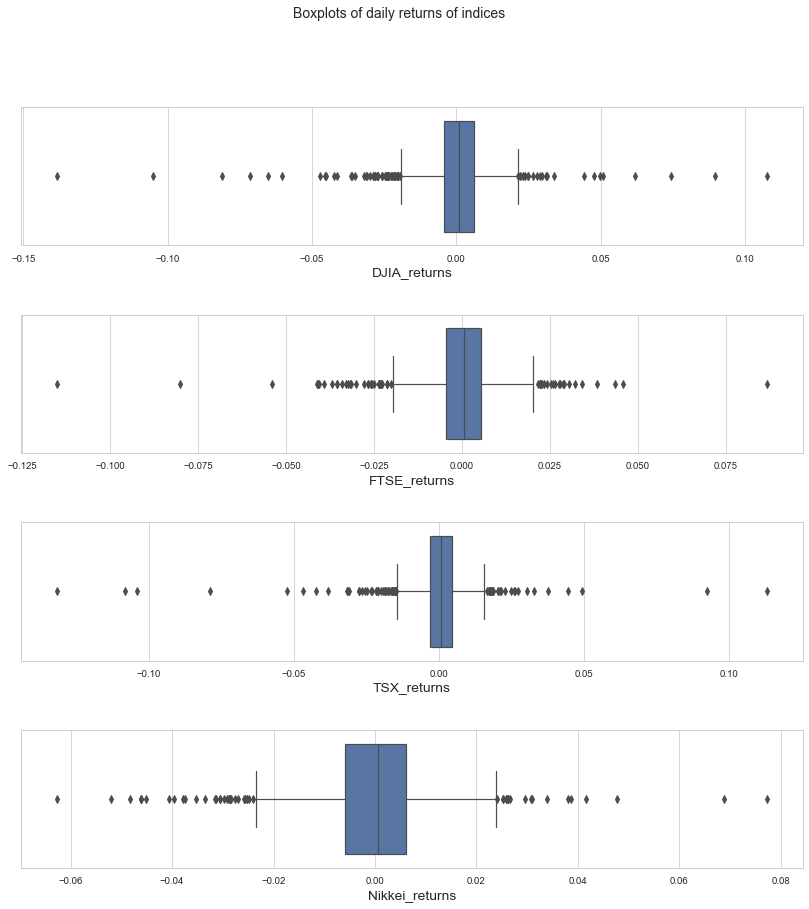

In [7]:
fig, axes = plt.subplots(4, 1, figsize=(14, 14))
plt.subplots_adjust(hspace=0.5)
for ticker, ax in zip(returns_col, axes.ravel()):
    sns.boxplot(data=df, x=ticker, ax=ax)
fig.suptitle("Boxplots of daily returns of indices", fontsize=14)
plt.show()

<div style="page-break-after: always;"></div>

#### Q-Q Plot

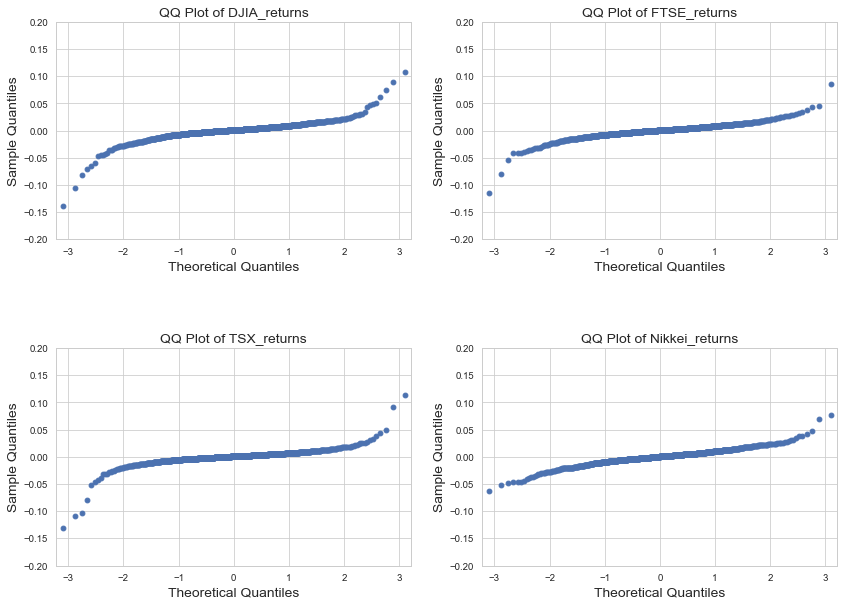

In [8]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
plt.subplots_adjust(hspace=0.5)
for ticker,ax in zip(returns_col,axes.ravel()):
    qqplot(df[ticker], ax=ax)
    ax.set_ylim(-0.2, 0.2)
    ax.set_title(f"QQ Plot of {ticker}")

<br></br>
All the plots above shows that the returns of all four indices are not normally distributed and have more outliers. Out of all four, Nikkei returns less volatile as its tail fatness is less compared to other three indices.

<div style="page-break-after: always;"></div>

#### Correlation of returns

In [9]:
corr = df[returns_col].corr()

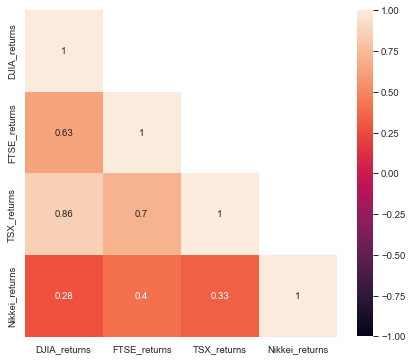

In [10]:
fig = plt.figure(figsize=(7,6))
sns.heatmap(corr, mask=np.triu(corr, 1), annot=True, vmin=-1, vmax=1)
plt.show()

<br></br>
From the above correlation heatmap, we can conclude that the returns of all four indices are positively correlated. However, the Nikkei returns are less positive than other three indices, which indicates potential diversification benefits.

<div style="page-break-after: always;"></div>

#### Test for stationarity

Stationary series is a series whose properties does not change in respect to the time window. ADF test is used to detect if the series is a stationary process.

In [11]:
def stationarity_test(series):
    adf, p_value, lags, _, critical, _ = adfuller(series)
    
    for i,j in critical.items():
        if adf < j:
            print(f"{ticker} is stationary at {i} significance level")
            print(f"adf statistic = {adf}")
            print(f"p-Value = {p_value}")
            print(f"Critical values are {critical}\n")
            break

    else:
        print("Not stationary")
        
for ticker in returns_col:
    stationarity_test(df[ticker])

DJIA_returns is stationary at 1% significance level
adf statistic = -11.247954574792965
p-Value = 1.7405798773987263e-20
Critical values are {'1%': -3.436866962597422, '5%': -2.864417284603703, '10%': -2.5683020002450507}

FTSE_returns is stationary at 1% significance level
adf statistic = -12.710023098948438
p-Value = 1.034975335784768e-23
Critical values are {'1%': -3.436860474327014, '5%': -2.8644144230916537, '10%': -2.568300476140699}

TSX_returns is stationary at 1% significance level
adf statistic = -11.796285074076334
p-Value = 9.562028870171108e-22
Critical values are {'1%': -3.436860474327014, '5%': -2.8644144230916537, '10%': -2.568300476140699}

Nikkei_returns is stationary at 1% significance level
adf statistic = -14.495907869560881
p-Value = 6.041671023568372e-27
Critical values are {'1%': -3.4368475364676088, '5%': -2.86440871710881, '10%': -2.568297437011397}



The ADF test confirms the returns of all four indices are stationary at 1% significance level.

<div style="page-break-after: always;"></div>

#### Auto-correlation in the returns

Auto-correlation is the correlation of a time-series with the lagged version of itself.
statsmodel ACF_plot function plots the auto-correlation plot upto the specified lag.

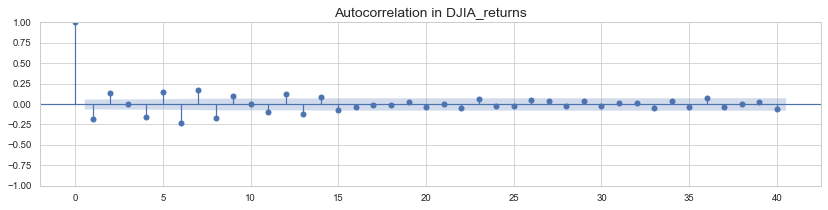

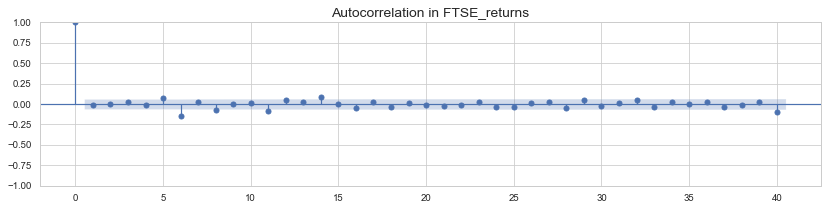

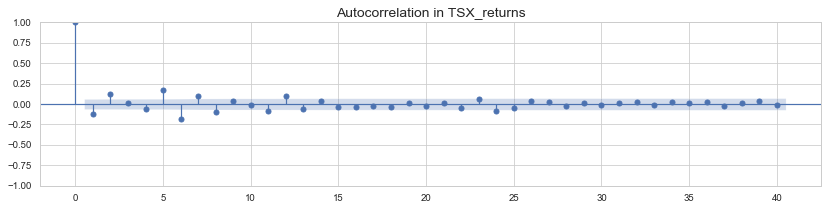

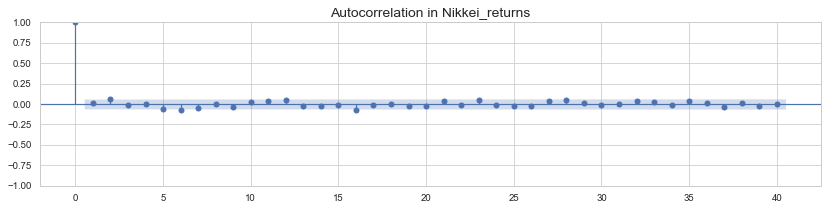

In [12]:
plt.rc("figure", figsize=(14,3))

for ticker in returns_col:
    plot_acf(df[ticker], title=f"Autocorrelation in {ticker}", lags=40)

DJIA and TSX index shows mild auto-correlation above the significance level till a lag period of 8 days, whereas Nikkei and FTSE has no auto-correlation at the significance level.

<div style="page-break-after: always;"></div>

### Real world examples from research papers

#### Market Dependence in Times of Turmoil

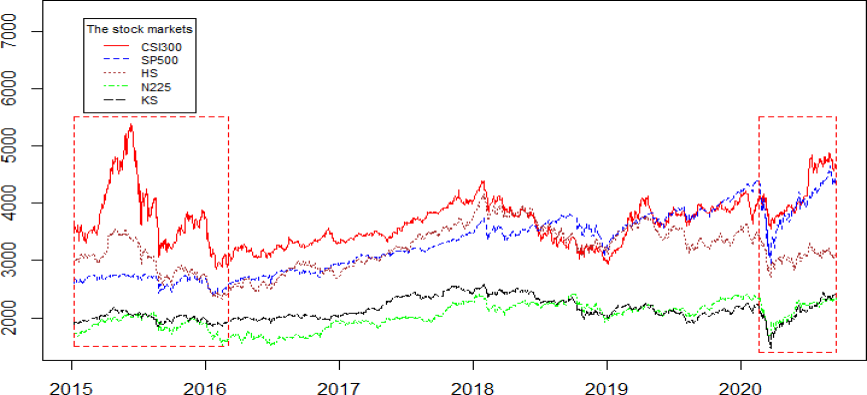

The above graph shows the volatility of equity benchmark indexes of different countries, Standard & Poor's Index (S&P 500, US), the Shanghai Shenzhen Index (CSI 300, China), the Hang Seng Index (HS, Hong Kong), the Nikkei Index (N225, Japan), and the KOSPI Composite Index (KS, South Korea) across five years. As we can observe from the graph, at the time of normal economic conditions, the volatilities vary as per the underlying factors of respective economy that is GDP growth, investors sentiments, capital expenditure by the governments, central bank polices and underlying firms’ performances etc. So, we can see over the course of normal market conditions, the Ups and downs are not extreme, and they are relatively independent among economies. 

The first red box shows a high volatility event driven by CSI 300. We can see its volatility has more correlation with that of HS as both are neighbour countries and have significant economic relationship. However, with other countries the spill over seems mild. If we focus on right hand side red box, the spill over is driven by US. We can see a sudden spike in volatility of all the indexes except HS. The combined analysis of both the boxes shows the correlations among different indexes are not static. They would keep changing over time. In conclusion, there are interdependencies among the given markets but risk spill over depends upon the market leading it. The Chinese led spill over had more effect on neighbour countries than far countries. Whereas the US market led spill over had significant effect on most of the mentioned countries. 

The correlation could be calculated for gauging relationship between multiple economies. Using this correlation, we could find out if an event is happening in one economy how likely, it is going to impact another economy based on correlation value. One could use negative correlated economies for managing the risk.


#### Volatility

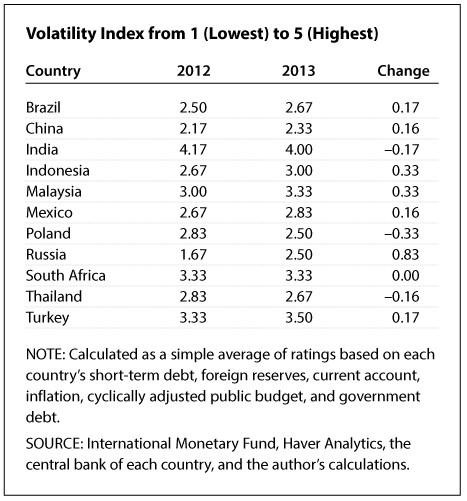

The above table shows volatility index of mentioned emerging countries. The emerging markets economies are significantly dependent on foreign investors’ money for investment. We can see high volatility level for few countries like India, which might be attributed to factors like short term investment cycle of investors and higher potential economic growth. Using volatility index, we have standardised the volatility among the countries for comparison purpose.

If all markets are accessible, then simpler metric to determine the capital allocation would be to calculate Sharpe Ratio for the indexes of these countries. The higher the ratio, higher would be the capital allocation. Which is calculated as ratio of return above risk free rate to volatility (standard deviation) of the portfolio return.

However, all volatilities are not bad for investment. If the volatility is happening for positive return, then it won’t be a such a bad thing for us and it won’t make sense to penalise investment for such volatility. To remedy this issue, Sortino Ratio would be much appropriate metric to use. It is calculated as ratio of return above Minimum Acceptable Return (MAR) to downside Volatility.

$ 
\hspace{3cm}\text{S} = \normalsize{\frac{(\text{R} – \text{MAR})}{\text{DR}}} \\
\hspace{3.5cm}\small{\text{where,}} \\
\hspace{4cm} \small{\text{S} = \text{Sortino ratio}}\\
\hspace{4cm} \small{\text{MAR} = \text{Minimum acceptable ratio}}\\
\hspace{4cm} \small{\text{DR} = \text{Downside volatility}}
$

#### References

Zehri, C. (2022), “Markets Dependence in Times of Turmoil: Evidence from US and Asia-
Pacific Stock Markets”, Montenegrin Journal of Economics, Vol. 18, No. 2, pp. 175-189

Ana Maria Santacreu, "The Economic Fundamentals of Emerging Market Volatility," Economic Synopses, No. 2, 2015. 
https://doi.org/10.20955/es.2015.2
